In [2]:
#r "nuget: SixLabors.ImageSharp"

Installed Packages SixLabors.ImageSharp, 2.1.3

In [174]:
#r "nuget: Plotly.NET, 2.0.0"
#r "nuget: Plotly.NET.Interactive, 2.0.0-preview.12"

Installed Packages Plotly.NET, 2.0.0 Plotly.NET.Interactive, 2.0.0-preview.12

In [329]:
open SixLabors.ImageSharp
open SixLabors.ImageSharp.Processing

In [330]:
open System
open System.IO

In [331]:
let _dataPath =
    Path.Combine(Environment.CurrentDirectory, "..", "Data/dataset/images")

In [383]:
let image: Image<PixelFormats.Rgba32> =
    Image.Load(Path.Combine(_dataPath, "imori_256x256.png"))

In [384]:
open Plotly.NET

In [385]:
let ImageShow (img: Image) =
    let ms = new MemoryStream()
    let b64 = Convert.ToBase64String(img.SaveAsPng ms |> ms.ToArray)
    Chart.Image(
        Source=($"data:image/jpg;base64,{b64}")
    )

<!-- Plotly chart will be drawn inside this DIV -->
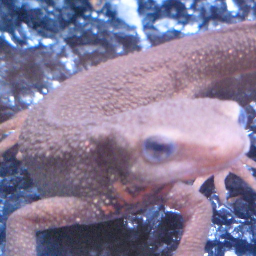

In [386]:
imageShow image

In [387]:
let image2 = image.Clone(ignore)
image2.Mutate (fun x -> x.Resize (image2.Width/2, image2.Height/2)  |> ignore)

<!-- Plotly chart will be drawn inside this DIV -->
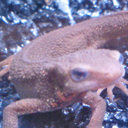

In [388]:
ImageShow image2

<!-- Plotly chart will be drawn inside this DIV -->
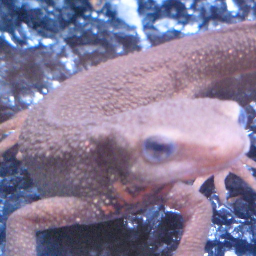
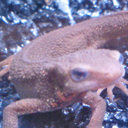

In [389]:
[
ImageShow image
ImageShow image2
] |> Chart.Grid (1,2)

In [390]:
let image3 = image.Clone(ignore)

In [1]:
image3.ProcessPixelRows (fun accessor ->
    printfn $"{accessor.GetRowSpan(0).Length}" 
    |> ignore)


input.fsx (1,1)-(1,7) typecheck error The value, namespace, type or module 'image3' is not defined.



Cell not executed: compilation error